# **Generalized linear models**: Logistic regression

Logistic regression is a <ins>supervised machine learning technique</ins>, such as linear regression. However, we will be dealing with a predictive model for problems where the dependent variable is neither ordered or continuous. In other words, logistic regression adapts to problems that contain discrete values ​​in their columns (as well as boolean/binary variables).

These discrete values ​​can be presented in different ways. Some examples are:
- **Conditional:**  1 or 0; True or False; Accept or Don't Accept; Pass or Fail.
- **Multiclass:** Blood types (A, B, AB, O); Alternatives of an objective exam (A, B, C, D, E).

When dealing with generalized linear models, **logistic regression** submits us to a <ins>classification problem</ins>. In this type of classification, we will have a finite set of possible values ​​that represent different categories. In most cases, these categories are transformed into numeric variables (integers), which greatly facilitates code implementation and data analysis.

While a linear regression model generates a real number as a classification parameter, logistic regression generates a probability value as the main parameter, called *threshold probability*. For example: in the binary classification, if the probability value is greater than a certain probability limit, we assign the label for that line to 1 or 0 otherwise, as shown in the next figure.

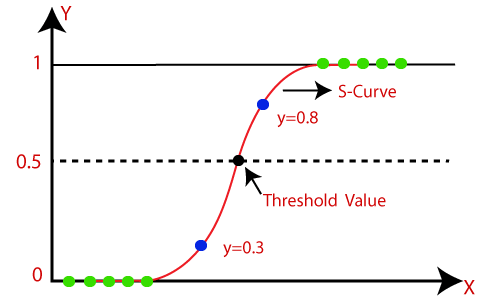

Curve from the logistic function. [Ref. 1](https://www.javatpoint.com/logistic-regression-in-machine-learning)




In logistic regression, we use a logistic function, also called *sigmoid*, which is a version of the linear function (y = m * x + b) used in linear regression. This function aims to map the predicted values for the probabilities, and any real value is mapped to another value within the range 0 and 1, with no possibility of resulting values greater than 1 or negative. It is interesting to note that for implementing a good Machine Learning model, the selection of this threshold probability that will limit the classifications is a key factor.


Assumptions for Logistic Regression:
- The dependent variable must be categorical in nature.
- The independent variable should not have multi-collinearity.


To implement the Logistic Regression, we will follow the steps below:
- Data Pre-processing
- Fitting Logistic Regression to the Training set
- Predicting the test result
- Test accuracy (Creation of Confusion matrix)

# Conditional (or Binary) Classification







## 1. Data Pre-processing:
In this step we will select the dataset that will be used and prepareted.


In [7]:
# Import necessary libraries 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

In the first case, for the binary classification problem we will use a dataset with some numeric values associated to random grades of students in a specific subject. The idea is to conduct an analisys of academic acceptance and classify if they were succesful (1 = positive class) or failed (0 = negative class).

In [8]:
grades = pd.DataFrame({'Student_ID' : pd.Series([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]),
                '1st_grade' : pd.Series([7, 4, 5, 6, 6, 8, 2, 4, 3, 9, 4, 5, 6, 1, 2, 4]),
               '2nd_grade' : pd.Series([2, 6, 5, 8, 9, 9, 4, 7, 10, 8, 4, 5, 2, 9, 10, 7]),
               '3rd_grade' : pd.Series([9, 8, 2, 6, 6, 7, 2, 5, 9, 2, 6, 7, 10, 8, 7, 5]),
               'Mean' : pd.Series([6, 6, 4, 6.7, 7, 8, 2.7, 5.3, 7.3, 6.3, 4.7, 5.7, 6, 6, 6.3, 5.3]),
               'Situation' : pd.Series([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0]),
                })

print(grades)

    Student_ID  1st_grade  2nd_grade  3rd_grade  Mean  Situation
0            0          7          2          9   6.0          1
1            1          4          6          8   6.0          1
2            2          5          5          2   4.0          0
3            3          6          8          6   6.7          1
4            4          6          9          6   7.0          1
5            5          8          9          7   8.0          1
6            6          2          4          2   2.7          0
7            7          4          7          5   5.3          0
8            8          3         10          9   7.3          1
9            9          9          8          2   6.3          1
10          10          4          4          6   4.7          0
11          11          5          5          7   5.7          0
12          12          6          2         10   6.0          1
13          13          1          9          8   6.0          1
14          14          2

For better analysis of the model will be used the matplotlib library:

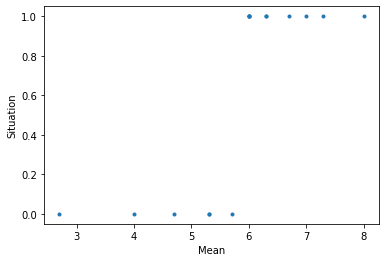

In [9]:
plt.scatter(grades['Mean'], grades['Situation'], marker = '.')
plt.ylabel("Situation")
plt.xlabel("Mean")

plt.show()

In [10]:
#Extracting independent and dependent variables  
x= grades.iloc[:, [1,2,3]].values  #The grades of the students are de independent variables
y= grades.iloc[:, 5].values  #The gituation of the students are de dependent variables

print(x)
print("----")
print(y)

[[ 7  2  9]
 [ 4  6  8]
 [ 5  5  2]
 [ 6  8  6]
 [ 6  9  6]
 [ 8  9  7]
 [ 2  4  2]
 [ 4  7  5]
 [ 3 10  9]
 [ 9  8  2]
 [ 4  4  6]
 [ 5  5  7]
 [ 6  2 10]
 [ 1  9  8]
 [ 2 10  7]
 [ 4  7  5]]
----
[1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0]


In [11]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.4, random_state=0) 

print("FOR TEST SET")
print(x_test)
print("----")
print(y_test)


print("\n FOR TRAINING SET")
print(x_train)
print("----")
print(y_train)

FOR TEST SET
[[ 4  6  8]
 [ 2  4  2]
 [ 3 10  9]
 [ 9  8  2]
 [ 1  9  8]
 [ 6  9  6]
 [ 5  5  2]]
----
[1 0 1 1 1 1 0]

 FOR TRAINING SET
[[ 2 10  7]
 [ 4  4  6]
 [ 4  7  5]
 [ 4  7  5]
 [ 5  5  7]
 [ 6  8  6]
 [ 7  2  9]
 [ 8  9  7]
 [ 6  2 10]]
----
[1 0 0 0 0 1 1 1 1]


In logistic regression, feature scaling needs to be done because we want accurate result of predictions. Here we will only scale the independent variable because dependent variable have only 0 and 1 values. Below is the code for it:

In [12]:
#feature scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

print("FOR TEST SET")
print(x_test)

print("\n FOR TRAINING SET")
print(x_train)

FOR TEST SET
[[-0.64282435  0.          0.69673301]
 [-1.79990817 -0.72760688 -3.06562526]
 [-1.22136626  1.45521375  1.32379273]
 [ 2.24988521  0.72760688 -3.06562526]
 [-2.37845008  1.09141031  0.69673301]
 [ 0.51425948  1.09141031 -0.55738641]
 [-0.06428243 -0.36380344 -3.06562526]]

 FOR TRAINING SET
[[-1.79990817  1.45521375  0.0696733 ]
 [-0.64282435 -0.72760688 -0.55738641]
 [-0.64282435  0.36380344 -1.18444612]
 [-0.64282435  0.36380344 -1.18444612]
 [-0.06428243 -0.36380344  0.0696733 ]
 [ 0.51425948  0.72760688 -0.55738641]
 [ 1.09280139 -1.45521375  1.32379273]
 [ 1.6713433   1.09141031  0.0696733 ]
 [ 0.51425948 -1.45521375  1.95085244]]


## 2. Fitting Logistic Regression to the Training set
After importing the class, we will create a classifier object and use it to fit the model to the logistic regression.

In [13]:
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)  

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 3. Predicting the test set result
To predict the result using test set data, it is necessary to creat a vector for test set result.

In [14]:
y_pred= classifier.predict(x_test)

print (y_pred)

[1 0 1 0 1 1 0]


In [15]:
classifier.predict_proba(x_train)

array([[0.39870144, 0.60129856],
       [0.75461927, 0.24538073],
       [0.74706136, 0.25293864],
       [0.74706136, 0.25293864],
       [0.47554552, 0.52445448],
       [0.39275574, 0.60724426],
       [0.20830481, 0.79169519],
       [0.12406493, 0.87593507],
       [0.15180446, 0.84819554]])

## 4. Test Accuracy

One method to discover the model's effectiveness is through the use of the confusion matrix, which represents the produced values of the model used in comparison with the real values, that is, it is possible to know the model's precision knowing how many values were produced correctly. 

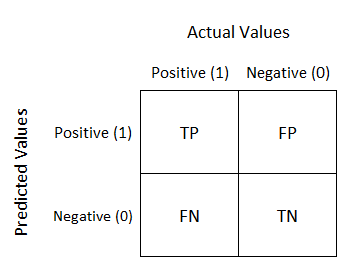

Confusion matrix. [Ref. 2](https://medium.com/@hpsuresh12345/logistic-regression-60694a973bee)


The confusion matrix, presented above, also helps us to find the accuracy of the model and avoid overfitting. Each values represents:

- In the upper left, we have the true positives (TP), values of the class sought correctly. 

- In the upper right corner are false positives (FP), which are the values of the class sought that were provided incorrectly. 

- At the bottom left are the false negatives (FN), the values of the class we are not looking for that were not published correctly. 

- At the lower right corner, there are the true negatives (TN), values of the class that we are not looking for that were correct. 


In [16]:
#Creating the Confusion matrix to test the performance of the model
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

print(cm)

[[2 0]
 [1 4]]


From the data generated by the matrix, it is possible to know the percentage of correctness of the model used through the equation:

$$Accuracy = Correct Predictions / Observations  = ( TP + TN ) / ( TP + FP + TN + FN )$$

In [17]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.8571428571428571


# Multiclass Classification

In the previous classifications, we worked with two categories or classes of data. With this, we could ask the question: “Did student X pass the test?” The answers “Yes” or “No” could be represented as 1 or 0, but if you need to work with any other question, such as “What is the genre of a particular movie?”, for exemple, there will be many possible answers to this question, so what can be done in this situation? 
   
This is an example of a **Multiclass Classification** problem, there are some methods to solve this problem, one of which is called <ins>one-versus-all</ins> or <ins>one-versus-rest</ins>. The ideia of this strategy aims to reduce the problem of multiclass classification to multiple binary classification problems. 

The techniques developed based on reducing the multi-class problem into multiple binary problems can also be called problem transformation techniques.One-versus-rest strategy involves training a single classifier per class, with the samples of that class as positive samples and all other samples as negatives. In other words, for this method, we choose a single category as a positive case (1) and the rest of the categories as false (0), in the example previously used for movie genres, we could have as answers: "horror", "action", "fiction" and "drama". With that, we can start by classifying “action” as the only positive case (1) and the rest of the genres, negative (0), after that, we will consider “horror” as the only positive case (1) and so on. In this way, we were able to divide the problem into several binary classifications and in each observation made, a probability of the model belonging to each category is generated.




#Final considerations

Based on what was previously presented, we were able to identify some interesting points related to *Logistic Regression* [Ref. 2](https://medium.com/@hpsuresh12345/logistic-regression-60694a973bee):

**Advantages**:

- This technique presented itself very efficient, which does not require too many computational resources;
- It’s highly interpretable and doesn’t require input features to be scaled;
- It’s also easy to regularize and it outputs well-calibrated predicted probabilities.
- Logistic regression does work better when you remove attributes that are unrelated to the output variable as well as attributes that are very similar (correlated) to each other;
- Feature Engineering plays an important role in regards to the performance of Logistic and also Linear Regression;
- This type of regression can be implemented relatively easy and quick, which make it as good baseline that you can use to measure the performance of other more complex Algorithms.

**Disadvantages**:

- With this technique we can’t solve non-linear problems since it’s decision surface is linear and can be easily outperformed by other complex and powerful algorithms;
- Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.